In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("ushape.csv",header=None)
# df=pd.read_csv("ushape.csv",header=None,names=['X','Y','class'])

In [ ]:
df=df.round(4)  # round of four place 
df.columns = ['X', 'Y', 'class']


In [18]:
df.head(5)

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1151,-0.0462,1.0
2,0.8825,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8295,-0.5393,1.0


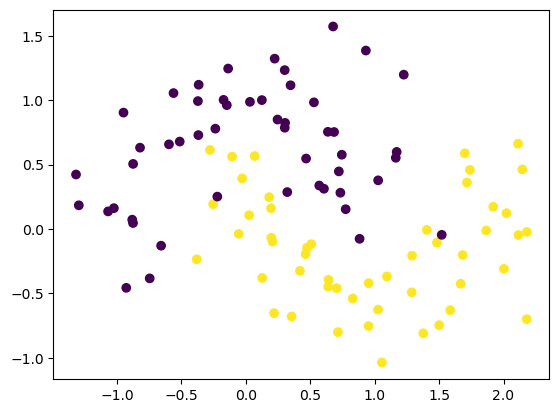

In [20]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [21]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [22]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

c:\Users\rosha\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [23]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\rosha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# set parameters to 0
model.get_weights()

[array([[ 1.0113367 ,  1.2197341 ],
        [ 1.004666  , -0.09703016]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.66181374],
        [ 1.0224043 ]], dtype=float32),
 array([0.], dtype=float32)]

In [25]:
initial_weights=model.get_weights()

In [26]:
model.set_weights(initial_weights)

In [27]:
model.get_weights()

[array([[ 1.0113367 ,  1.2197341 ],
        [ 1.004666  , -0.09703016]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.66181374],
        [ 1.0224043 ]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.7875 - loss: 0.5347 - val_accuracy: 0.8500 - val_loss: 0.5400
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7875 - loss: 0.5335 - val_accuracy: 0.8500 - val_loss: 0.5391
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7875 - loss: 0.5325 - val_accuracy: 0.8500 - val_loss: 0.5382
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7875 - loss: 0.5315 - val_accuracy: 0.8500 - val_loss: 0.5373
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7875 - loss: 0.5305 - val_accuracy: 0.8500 - val_loss: 0.5365
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7875 - loss: 0.5295 - val_accuracy: 0.8500 - val_loss: 0.5356
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7875 - loss: 0.5285 - val_accuracy: 0.8500 - val_loss: 0.5347
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7875 - loss: 0.5275 - val_accuracy: 0.8500 - val_loss

In [30]:
model.get_weights()

[array([[ 0.84769326,  1.3629347 ],
        [ 1.2750623 , -0.3628752 ]], dtype=float32),
 array([0.10838252, 0.01962407], dtype=float32),
 array([[-0.8692477],
        [ 1.2097878]], dtype=float32),
 array([-0.12566741], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 630us/step


<Axes: >

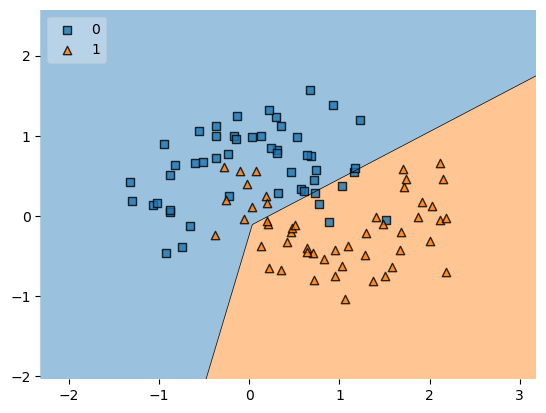

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)